In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:

def calculate_mean_std(fold_dfs, column):
    data = np.array([df[column].values for df in fold_dfs])
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return mean, std

In [3]:
directory_path = 'kfold_test_0.3_30epochs'
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
fold_dfs = [pd.read_csv(os.path.join(directory_path, csv_file)) for csv_file in csv_files]
#print(fold_dfs)

In [4]:

train_loss_mean, train_loss_std = calculate_mean_std(fold_dfs, 'loss')
val_loss_mean, val_loss_std = calculate_mean_std(fold_dfs, 'val_loss')
train_acc_mean, train_acc_std = calculate_mean_std(fold_dfs, 'sparse_categorical_accuracy')
val_acc_mean, val_acc_std = calculate_mean_std(fold_dfs, 'val_sparse_categorical_accuracy')



In [5]:
epochs = range(1, len(train_loss_mean) + 1)

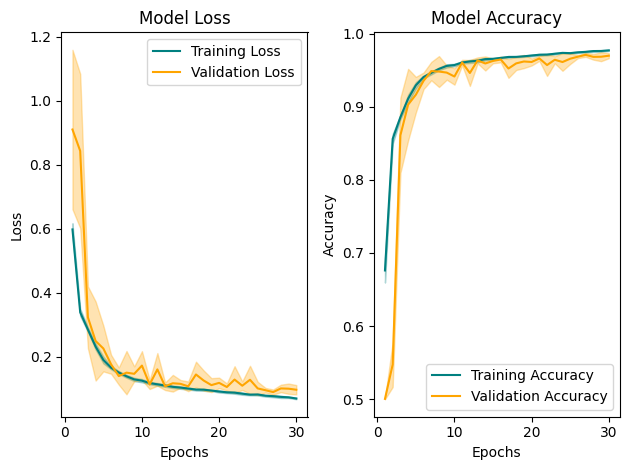

In [6]:
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_mean, label='Training Loss', color='teal')
plt.fill_between(epochs, train_loss_mean - train_loss_std, train_loss_mean + train_loss_std, alpha=0.3, color='teal')
plt.plot(epochs, val_loss_mean, label='Validation Loss', color='orange')
plt.fill_between(epochs, val_loss_mean - val_loss_std, val_loss_mean + val_loss_std, alpha=0.3, color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_mean, label='Training Accuracy', color='teal')
plt.fill_between(epochs, train_acc_mean - train_acc_std, train_acc_mean + train_acc_std, alpha=0.3, color='teal')
plt.plot(epochs, val_acc_mean, label='Validation Accuracy', color='orange')
plt.fill_between(epochs, val_acc_mean - val_acc_std, val_acc_mean + val_acc_std, alpha=0.3, color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

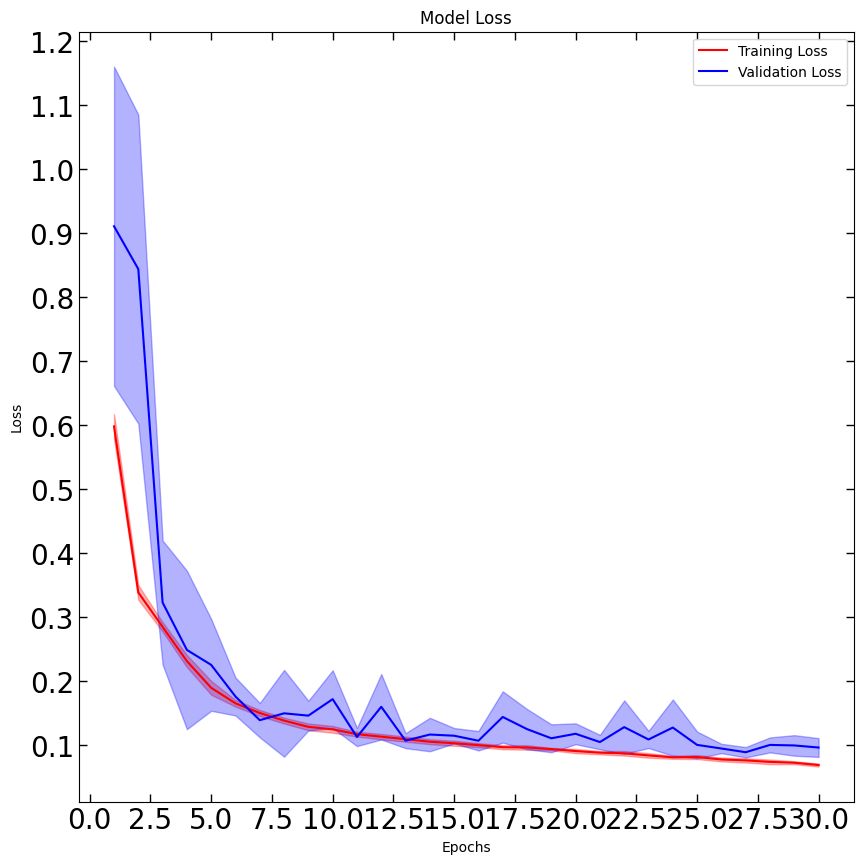

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(epochs, train_loss_mean, label='Training Loss', color='red')
plt.fill_between(epochs, train_loss_mean - train_loss_std, train_loss_mean + train_loss_std, alpha=0.3, color='red')
plt.plot(epochs, val_loss_mean, label='Validation Loss', color='blue')
plt.fill_between(epochs, val_loss_mean - val_loss_std, val_loss_mean + val_loss_std, alpha=0.3, color='blue')
plt.tick_params(labelsize=20,direction='in',top=True,right=True,width='1',size=6)
#plt.xlim(0,30)
plt.locator_params(axis="x", nbins=15)
plt.locator_params(axis="y", nbins=15)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

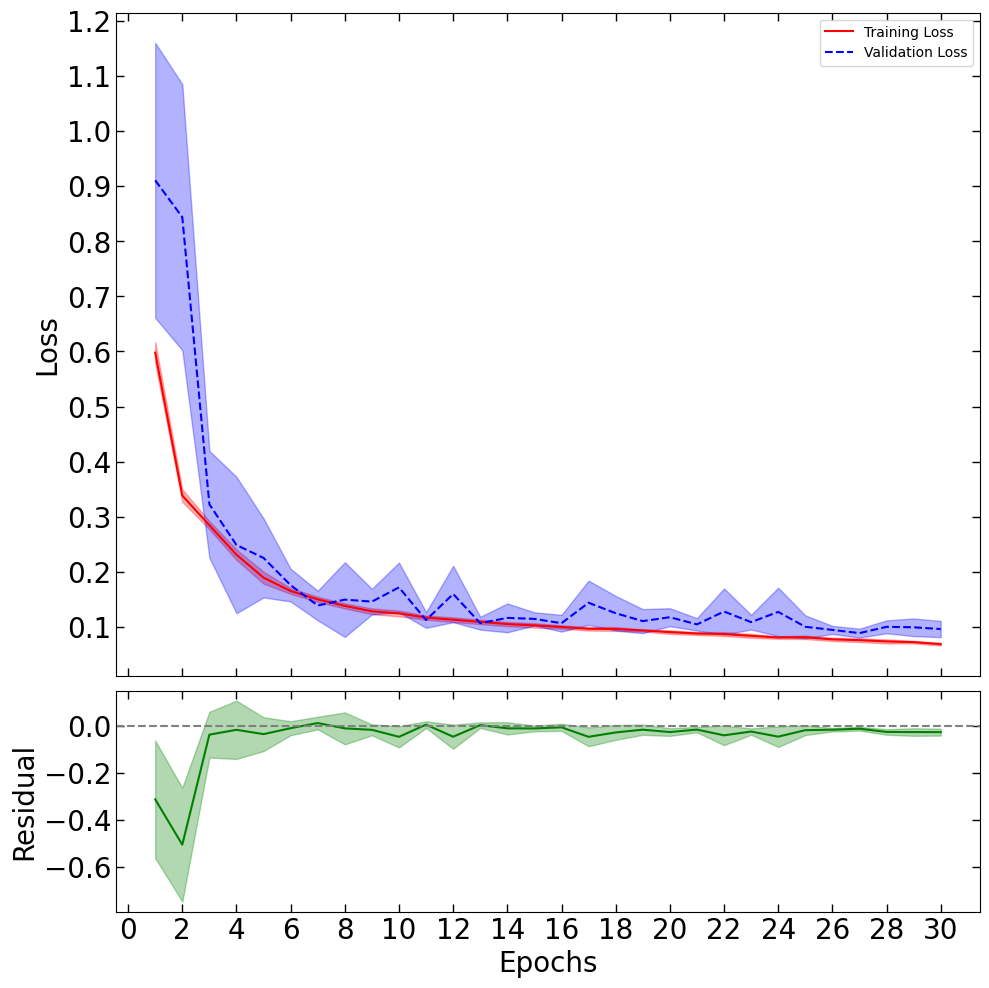

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
residuals_loss = train_loss_mean - val_loss_mean
# Plot training and validation accuracy
ax1.plot(epochs, train_loss_mean, label='Training Loss', color='red')
ax1.fill_between(epochs, train_loss_mean - train_loss_std, train_loss_mean + train_loss_std, alpha=0.3, color='red')
ax1.plot(epochs, val_loss_mean, label='Validation Loss', color='blue',linestyle='dashed')
ax1.fill_between(epochs, val_loss_mean - val_loss_std, val_loss_mean + val_loss_std, alpha=0.3, color='blue')
#ax1.axvline(x=33, color='black', linestyle='--', linewidth=2, label='Best Model')
ax1.tick_params(labelsize=20, direction='in', top=True, right=True, width='1', size=6)
ax1.locator_params(axis="x", nbins=15)
ax1.locator_params(axis="y", nbins=15)
#ax1.set_title('Training and Validation Loss')
ax1.legend(fontsize=10)
ax1.set_ylabel('Loss', fontsize=20)

# Plot residuals
ax2.plot(epochs, residuals_loss, label='Residuals', color='green')
ax2.tick_params(labelsize=20, direction='in', top=True, right=True, width='1', size=6)
ax2.fill_between(epochs, residuals_loss - val_loss_std, residuals_loss + val_loss_std, alpha=0.3, color='green')
ax2.axhline(y=0, color='grey', linestyle='--', linewidth=1.5)
ax2.locator_params(axis="x", nbins=20)
ax2.locator_params(axis="y", nbins=5)
ax2.set_title('')
ax2.set_xlabel('Epochs', fontsize=20)
ax2.set_ylabel('Residual', fontsize=20)

plt.tight_layout()
plt.show()
#plt.savefig('kfold_test_0.3/Loss_complex_model_50epochs_residual.png',facecolor='white',dpi=200)

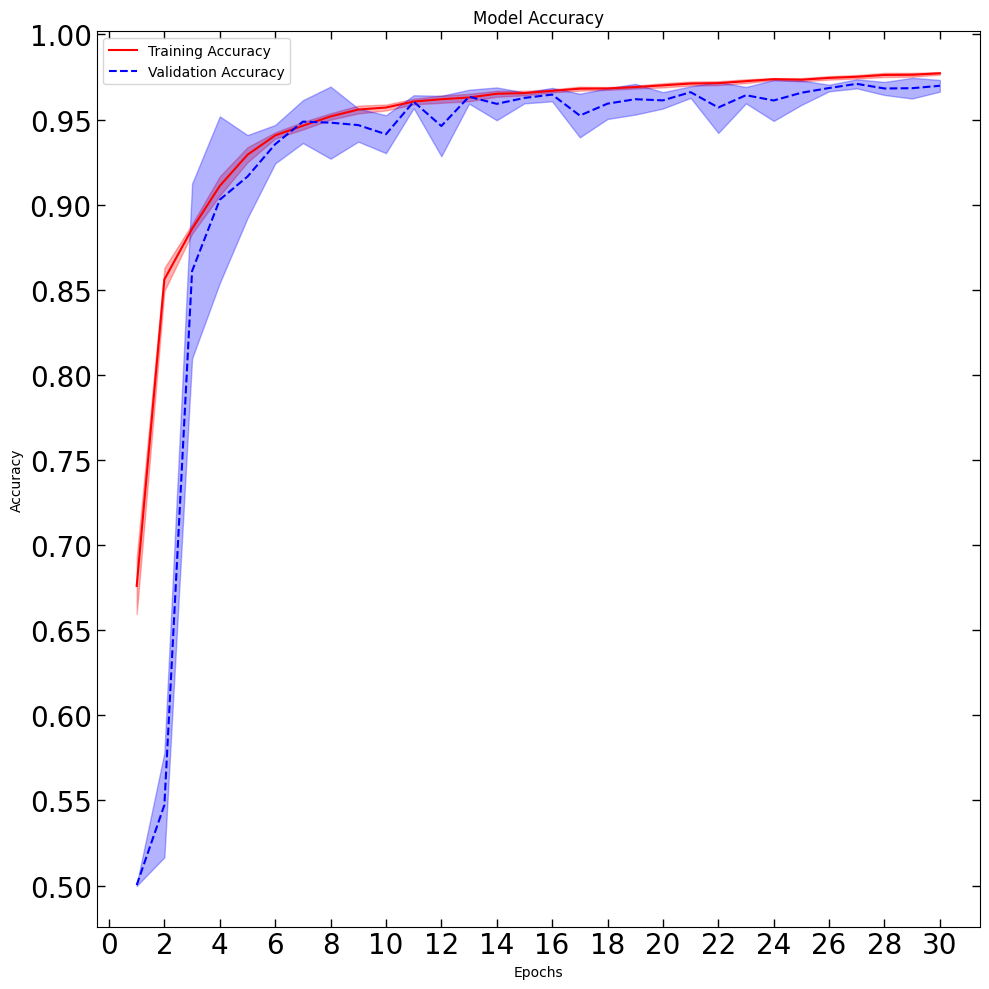

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(epochs, train_acc_mean, label='Training Accuracy', color='red')
plt.fill_between(epochs, train_acc_mean - train_acc_std, train_acc_mean + train_acc_std, alpha=0.3, color='red')
plt.plot(epochs, val_acc_mean, label='Validation Accuracy', color='blue', linestyle = 'dashed')
plt.fill_between(epochs, val_acc_mean - val_acc_std, val_acc_mean + val_acc_std, alpha=0.3, color='blue')
plt.tick_params(labelsize=20,direction='in',top=True,right=True,width='1',size=6)
#plt.xlim(0,30)
plt.locator_params(axis="x", nbins=20)
plt.locator_params(axis="y", nbins=15)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

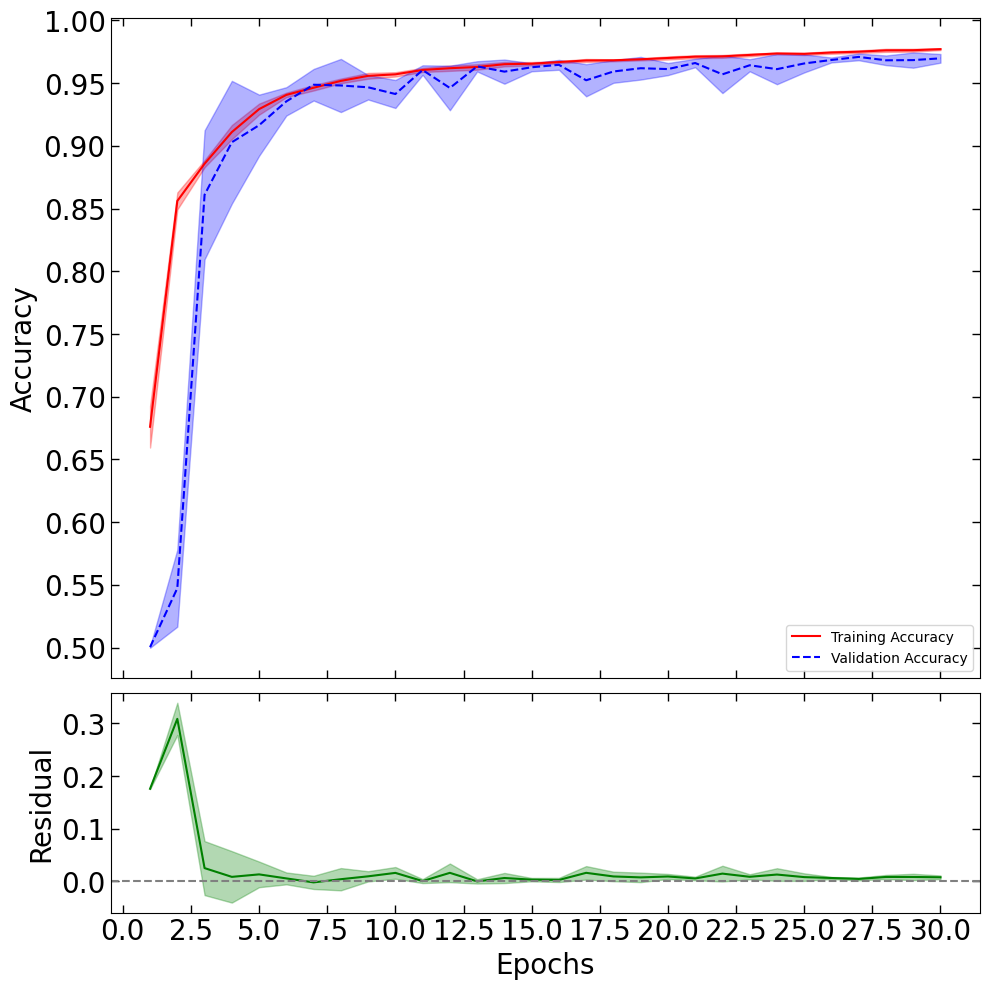

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
residuals_acc = train_acc_mean - val_acc_mean
# Plot training and validation accuracy
ax1.plot(epochs, train_acc_mean, label='Training Accuracy', color='red')
ax1.fill_between(epochs, train_acc_mean - train_acc_std, train_acc_mean + train_acc_std, alpha=0.3, color='red')
ax1.plot(epochs, val_acc_mean, label='Validation Accuracy', color='blue',linestyle='dashed')
ax1.fill_between(epochs, val_acc_mean - val_acc_std, val_acc_mean + val_acc_std, alpha=0.3, color='blue')
#ax1.axvline(x=33, color='black', linestyle='--', linewidth=2, label='Best Model')
ax1.tick_params(labelsize=20, direction='in', top=True, right=True, width='1', size=6)
ax1.locator_params(axis="x", nbins=15)
ax1.locator_params(axis="y", nbins=15)
#ax1.set_title('Training and Validation Loss')
ax1.legend(fontsize=10,loc='lower right')
ax1.set_ylabel('Accuracy', fontsize=20)

# Plot residuals
ax2.plot(epochs, residuals_acc, label='Residuals', color='green')
ax2.tick_params(labelsize=20, direction='in', top=True, right=True, width='1', size=6)
ax2.fill_between(epochs, residuals_acc - val_acc_std, residuals_acc + val_acc_std, alpha=0.3, color='green')
ax2.axhline(y=0, color='grey', linestyle='--', linewidth=1.5)
ax2.locator_params(axis="x", nbins=15)
ax2.locator_params(axis="y", nbins=5)
ax2.set_title('')
ax2.set_xlabel('Epochs', fontsize=20)
ax2.set_ylabel('Residual', fontsize=20)

plt.tight_layout()
plt.show()
#plt.savefig('kfold_test_0.3/Accuracy_complex_model_50epochs_residual.png',facecolor='white',dpi=200)